In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load & transformation dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
url = '/content/drive/MyDrive/datova_kostka.csv'
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92033 entries, 0 to 92032
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pcv                  92033 non-null  int64  
 1   vin                  91549 non-null  object 
 2   co2                  25403 non-null  float64
 3   hluk_jizda           58672 non-null  float64
 4   hmotnost_povolena    91582 non-null  float64
 5   hmotnost_pripustna   91247 non-null  float64
 6   hmotnost_provozni    91592 non-null  float64
 7   stav                 86341 non-null  object 
 8   prohlidka            1 non-null      object 
 9   prevodovka           24853 non-null  object 
 10  barva                90392 non-null  object 
 11  kategorie            90912 non-null  object 
 12  karoserie            42909 non-null  object 
 13  model                46868 non-null  object 
 14  druh                 91790 non-null  object 
 15  vyroba_rok           60908 non-null 

<ipython-input-3-1e9de2ecf1c3>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(url)


In [4]:
df= df.drop_duplicates()

In [5]:
threshold = 0.5
df= df.loc[:, df.isnull().mean() <= threshold]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92033 entries, 0 to 92032
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pcv                  92033 non-null  int64  
 1   vin                  91549 non-null  object 
 2   hluk_jizda           58672 non-null  float64
 3   hmotnost_povolena    91582 non-null  float64
 4   hmotnost_pripustna   91247 non-null  float64
 5   hmotnost_provozni    91592 non-null  float64
 6   stav                 86341 non-null  object 
 7   barva                90392 non-null  object 
 8   kategorie            90912 non-null  object 
 9   model                46868 non-null  object 
 10  druh                 91790 non-null  object 
 11  vyroba_rok           60908 non-null  float64
 12  vyrobce              53305 non-null  object 
 13  vyrobce_motoru       58984 non-null  object 
 14  znacka               68545 non-null  object 
 15  max_vykon            64262 non-null 

In [6]:
# Filling missing values for categorical and numerical columns
for col in df.columns:
    if df[col].dtype == 'object':
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
    else:
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92033 entries, 0 to 92032
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pcv                  92033 non-null  int64  
 1   vin                  92033 non-null  object 
 2   hluk_jizda           92033 non-null  float64
 3   hmotnost_povolena    92033 non-null  float64
 4   hmotnost_pripustna   92033 non-null  float64
 5   hmotnost_provozni    92033 non-null  float64
 6   stav                 92033 non-null  object 
 7   barva                92033 non-null  object 
 8   kategorie            92033 non-null  object 
 9   model                92033 non-null  object 
 10  druh                 92033 non-null  object 
 11  vyroba_rok           92033 non-null  float64
 12  vyrobce              92033 non-null  object 
 13  vyrobce_motoru       92033 non-null  object 
 14  znacka               92033 non-null  object 
 15  max_vykon            92033 non-null 

In [8]:
# Column transformation to datetime
df['prvni_registrace'] = pd.to_datetime(df['prvni_registrace'], errors='coerce')
df['prvni_registrace_cr'] = pd.to_datetime(df['prvni_registrace_cr'], errors='coerce')
df['vyroba_rok'] = pd.to_datetime(df['vyroba_rok'], format='%Y').dt.year

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92033 entries, 0 to 92032
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   pcv                  92033 non-null  int64         
 1   vin                  92033 non-null  object        
 2   hluk_jizda           92033 non-null  float64       
 3   hmotnost_povolena    92033 non-null  float64       
 4   hmotnost_pripustna   92033 non-null  float64       
 5   hmotnost_provozni    92033 non-null  float64       
 6   stav                 92033 non-null  object        
 7   barva                92033 non-null  object        
 8   kategorie            92033 non-null  object        
 9   model                92033 non-null  object        
 10  druh                 92033 non-null  object        
 11  vyroba_rok           92033 non-null  int32         
 12  vyrobce              92033 non-null  object        
 13  vyrobce_motoru       92033 non-

In [9]:
invalid_dates = df[df['prvni_registrace_cr'].isna()]
invalid_dates['prvni_registrace_cr'].unique()

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [10]:
invalid_dates_r = df[df['prvni_registrace'].isna()]
invalid_dates_r['prvni_registrace'].unique()

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [11]:
df= df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91766 entries, 0 to 92032
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   pcv                  91766 non-null  int64         
 1   vin                  91766 non-null  object        
 2   hluk_jizda           91766 non-null  float64       
 3   hmotnost_povolena    91766 non-null  float64       
 4   hmotnost_pripustna   91766 non-null  float64       
 5   hmotnost_provozni    91766 non-null  float64       
 6   stav                 91766 non-null  object        
 7   barva                91766 non-null  object        
 8   kategorie            91766 non-null  object        
 9   model                91766 non-null  object        
 10  druh                 91766 non-null  object        
 11  vyroba_rok           91766 non-null  int32         
 12  vyrobce              91766 non-null  object        
 13  vyrobce_motoru       91766 non-null 

In [13]:
df['rok_registrace_cr'] = df['prvni_registrace_cr'].dt.year
df['rok_registrace'] = df['prvni_registrace'].dt.year


**Přidávám kolonku pro místo první registrace auta: ČR nebo jiné země**

In [14]:
df['místo_prvni_registrace'] = np.where(df['prvni_registrace'] == df['prvni_registrace_cr'], 'Česká republika', 'Inne')
df['místo_prvni_registrace'].unique()

array(['Inne', 'Česká republika'], dtype=object)

In [15]:
df.columns

Index(['pcv', 'vin', 'hluk_jizda', 'hmotnost_povolena', 'hmotnost_pripustna',
       'hmotnost_provozni', 'stav', 'barva', 'kategorie', 'model', 'druh',
       'vyroba_rok', 'vyrobce', 'vyrobce_motoru', 'znacka', 'max_vykon',
       'min_otacky', 'palivo', 'zdvihovy_objem', 'delka', 'sirka', 'vyska',
       'spotreba_mimo_mesto', 'spotreba_prumerna', 'prvni_registrace',
       'prvni_registrace_cr', 'rok_registrace_cr', 'rok_registrace',
       'místo_prvni_registrace'],
      dtype='object')

# Výpočet a výstup požadovaných výsledků za poslední den

In [16]:
last_registration_date = df['prvni_registrace'].max()
last_registration_date

Timestamp('2024-11-19 00:00:00')

In [17]:
last_day_cars = df[df['prvni_registrace'] == last_registration_date]

In [18]:
last_day_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 27268 to 83775
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pcv                     4 non-null      int64         
 1   vin                     4 non-null      object        
 2   hluk_jizda              4 non-null      float64       
 3   hmotnost_povolena       4 non-null      float64       
 4   hmotnost_pripustna      4 non-null      float64       
 5   hmotnost_provozni       4 non-null      float64       
 6   stav                    4 non-null      object        
 7   barva                   4 non-null      object        
 8   kategorie               4 non-null      object        
 9   model                   4 non-null      object        
 10  druh                    4 non-null      object        
 11  vyroba_rok              4 non-null      int32         
 12  vyrobce                 4 non-null      object     

In [19]:
last_day_cars

,pcv,vin,hluk_jizda,hmotnost_povolena,hmotnost_pripustna,hmotnost_provozni,stav,barva,kategorie,model,...,delka,sirka,vyska,spotreba_mimo_mesto,spotreba_prumerna,prvni_registrace,prvni_registrace_cr,rok_registrace_cr,rok_registrace,místo_prvni_registrace
27268,18697800,JTMY53FV40D058677,68.0,2135.0,2135.0,1685.0,PROVOZOVANE,CERNA,M1,RAV4,...,4600.0,1855.0,1685.0,5.629995,5.700000,2024-11-19,2024-11-19,2024,2024,Česká republika
28725,18698400,LL8AWTHW1P0H00350,79.0,554.0,554.0,384.0,PROVOZOVANE,ZLUTA,L7,OCTAVIA,...,2330.0,1180.0,1265.0,5.629995,6.000000,2024-11-19,2024-11-19,2024,2024,Česká republika
32860,18698600,NLHBM81G5SZ534754,68.0,1660.0,1660.0,1195.0,PROVOZOVANE,ZELENA,M1,OCTAVIA,...,4180.0,1775.0,1500.0,5.629995,5.500000,2024-11-19,2024-11-19,2024,2024,Česká republika
83775,18698800,YV12ZEL97RS046491,65.0,2240.0,2240.0,1850.0,PROVOZOVANE,CERNA,M1,OCTAVIA,...,4233.0,1838.0,1550.0,5.629995,6.553595,2024-11-19,2024-11-19,2024,2024,Česká republika


# Výpočet a výstup požadovaných výsledků za poslední týden



In [20]:
# Last week period
week_ago = last_registration_date - pd.DateOffset(weeks=1)

# Cars registered in the last week
last_week_cars = df[df['prvni_registrace_cr'] >= week_ago]


In [21]:
last_week_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 10386 to 91822
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pcv                     57 non-null     int64         
 1   vin                     57 non-null     object        
 2   hluk_jizda              57 non-null     float64       
 3   hmotnost_povolena       57 non-null     float64       
 4   hmotnost_pripustna      57 non-null     float64       
 5   hmotnost_provozni       57 non-null     float64       
 6   stav                    57 non-null     object        
 7   barva                   57 non-null     object        
 8   kategorie               57 non-null     object        
 9   model                   57 non-null     object        
 10  druh                    57 non-null     object        
 11  vyroba_rok              57 non-null     int32         
 12  vyrobce                 57 non-null     object    

In [22]:
last_week_cars.head()


,pcv,vin,hluk_jizda,hmotnost_povolena,hmotnost_pripustna,hmotnost_provozni,stav,barva,kategorie,model,...,delka,sirka,vyska,spotreba_mimo_mesto,spotreba_prumerna,prvni_registrace,prvni_registrace_cr,rok_registrace_cr,rok_registrace,místo_prvni_registrace
10386,18693200,2FMTK4V31JBB45545,68.0,2555.0,2555.0,1949.0,PROVOZOVANE,SEDA,M1,OCTAVIA,...,4808.0,1928.0,1750.0,5.500000,5.900000,2018-04-11,2024-11-14,2024,2018,Inne
10686,18688600,3LP016502,82.0,480.0,480.0,239.0,PROVOZOVANE,CERNA,L3,OCTAVIA,...,2335.0,840.0,1190.0,5.629995,6.553595,1993-06-11,2024-11-12,2024,1993,Inne
15229,18696200,5YJ3E7EC6MF964121,70.0,2232.0,2232.0,1919.0,PROVOZOVANE,CERNA,M1,OCTAVIA,...,4694.0,1850.0,1443.0,5.629995,6.553595,2021-06-21,2024-11-18,2024,2021,Inne
22313,18693400,JHMGD18502S252638,72.3,1490.0,1490.0,1090.0,PROVOZOVANE,SEDA,M1,OCTAVIA,...,3830.0,1675.0,1525.0,5.000000,5.800000,2003-04-16,2024-11-14,2024,2003,Inne
25520,18691200,JN1T33TB4U0026371,64.0,2345.0,2345.0,1929.0,PROVOZOVANE,BILA,M1,OCTAVIA,...,4680.0,1840.0,1720.0,5.629995,6.300000,2024-11-13,2024-11-13,2024,2024,Česká republika


In [23]:
grouped_week_motor = last_week_cars.groupby(['palivo']).size().reset_index(name='count')
grouped_week_motor = grouped_week_motor.sort_values(by='count', ascending=False)
print(grouped_week_motor)

         palivo  count
0        Benzin     32
2         Nafta     20
1  Elektropohon      5


<ipython-input-24-1e33a70c433a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


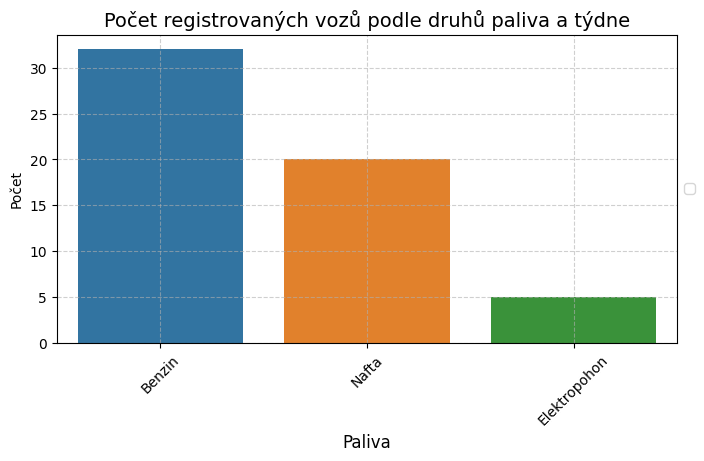

In [24]:
# Graf: Registrace_podle_paliva_a_týdne

plt.figure(figsize=(8, 4))
sns.barplot(
    x='palivo',
    y='count',

    data=grouped_week_motor,
    palette='tab10',
    errorbar=None,

)

plt.title("Počet registrovaných vozů podle druhů paliva a týdne", fontsize=14)
plt.xlabel("Paliva", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig('Registrace_podle_paliva_a_týdne.png', bbox_inches='tight', dpi=300)
plt.show()

In [25]:
grouped_week_brand = last_week_cars.groupby(['znacka']).size().reset_index(name='count')
grouped_week_brand = grouped_week_brand.sort_values(by='count', ascending=False)
top_10_brand_week= grouped_week_brand.head(10)
print(top_10_brand_week)

     znacka  count
28    ŠKODA     15
26       VW      7
6      FORD      4
25    VOLVO      2
24   VEZEKO      2
7     HONDA      2
18  RENAULT      2
1      AUDI      2
16   NISSAN      1
27   YAMAHA      1


<ipython-input-26-c28e920dcf25>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


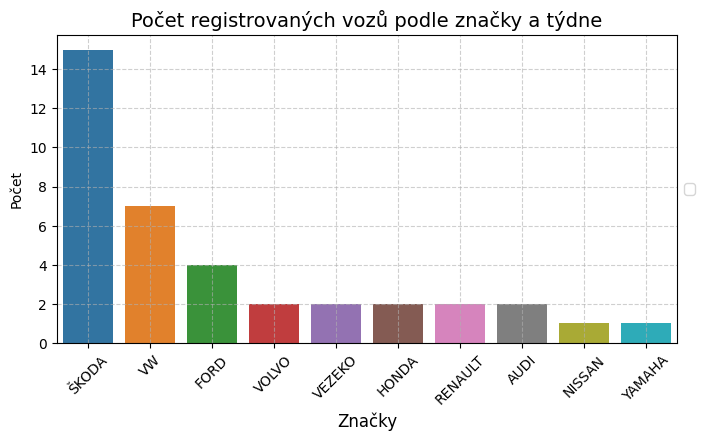

In [26]:
# Graf: Registrace_podle_znacky_a_týdne

plt.figure(figsize=(8, 4))
sns.barplot(
    x='znacka',
    y='count',
    data=top_10_brand_week,
    palette='tab10',
    errorbar=None,

)

plt.title("Počet registrovaných vozů podle značky a týdne", fontsize=14)
plt.xlabel("Značky", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig('Top_10_registrovanych_vozu_podle_značky_a_týdne.png', bbox_inches='tight', dpi=300)
plt.show()

In [27]:
grouped_week_type = last_week_cars.groupby(['druh']).size().reset_index(name='count')
grouped_week_type= grouped_week_type.sort_values(by='count', ascending=False)
print(grouped_week_type)

                        druh  count
2           OSOBNÍ AUTOMOBIL     42
4           PŘÍPOJNÉ VOZIDLO      6
0                   MOTOCYKL      4
1         NÁKLADNÍ AUTOMOBIL      3
3  PRACOVNÍ STROJ SAMOJÍZDNÝ      1
5  VOZIDLO ZVLÁŠTNÍHO URČENÍ      1


<ipython-input-28-f8fd24dad519>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


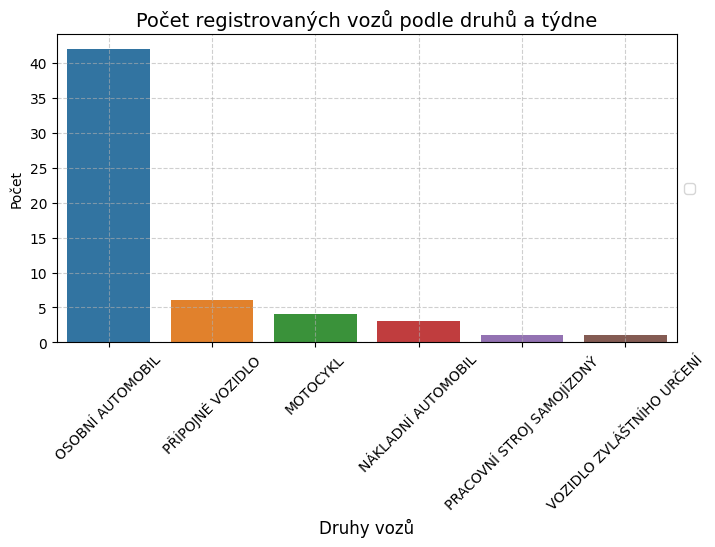

In [28]:
# Graf: Registrace_podle_druhu_vozu_a_týdne

plt.figure(figsize=(8, 4))
sns.barplot(
    x='druh',
    y='count',
    data=grouped_week_type,
    palette='tab10',
    errorbar=None,

)

plt.title("Počet registrovaných vozů podle druhů a týdne", fontsize=14)
plt.xlabel("Druhy vozů", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig('Registrace_podle_druhu_vozu_a_týdne.png', bbox_inches='tight', dpi=300)
plt.show()

#Výpočet a výstup požadovaných výsledků za poslední měsíc

In [29]:
# Last month period
month_ago = last_registration_date - pd.DateOffset(months=1)

# Cars registered in the last week
last_month_cars = df[df['prvni_registrace'] >= month_ago]



In [30]:
last_month_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 19506 to 91822
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pcv                     140 non-null    int64         
 1   vin                     140 non-null    object        
 2   hluk_jizda              140 non-null    float64       
 3   hmotnost_povolena       140 non-null    float64       
 4   hmotnost_pripustna      140 non-null    float64       
 5   hmotnost_provozni       140 non-null    float64       
 6   stav                    140 non-null    object        
 7   barva                   140 non-null    object        
 8   kategorie               140 non-null    object        
 9   model                   140 non-null    object        
 10  druh                    140 non-null    object        
 11  vyroba_rok              140 non-null    int32         
 12  vyrobce                 140 non-null    object   

In [31]:
last_month_cars.shape

(140, 29)

In [32]:
last_month_cars.head()

,pcv,vin,hluk_jizda,hmotnost_povolena,hmotnost_pripustna,hmotnost_provozni,stav,barva,kategorie,model,...,delka,sirka,vyska,spotreba_mimo_mesto,spotreba_prumerna,prvni_registrace,prvni_registrace_cr,rok_registrace_cr,rok_registrace,místo_prvni_registrace
19506,18668600,6FPPXXMJ2PRD30387,71.0,3350.0,3350.0,2373.0,PROVOZOVANE,SEDA,N1,OCTAVIA,...,5370.0,1918.0,1884.0,5.629995,10.200000,2024-10-30,2024-10-30,2024,2024,Česká republika
25520,18691200,JN1T33TB4U0026371,64.0,2345.0,2345.0,1929.0,PROVOZOVANE,BILA,M1,OCTAVIA,...,4680.0,1840.0,1720.0,5.629995,6.300000,2024-11-13,2024-11-13,2024,2024,Česká republika
26087,18690800,JTHAAAAE601002118,66.0,1755.0,1755.0,1355.0,PROVOZOVANE,MODRA,M1,OCTAVIA,...,4190.0,1825.0,1550.0,5.629995,4.500000,2024-11-13,2024-11-13,2024,2024,Česká republika
26132,18670400,LCEFDTZ42R6002462,84.9,612.0,612.0,434.0,PROVOZOVANE,CERNA,T3,OCTAVIA,...,2186.0,1157.0,1210.0,5.629995,6.553595,2024-10-30,2024-10-30,2024,2024,Česká republika
26244,18663000,LCELV1ZTXR6002432,84.9,768.0,768.0,558.0,PROVOZOVANE,SEDA,T3,OCTAVIA,...,2445.0,1264.0,1450.0,5.629995,6.553595,2024-10-23,2024-10-23,2024,2024,Česká republika


In [33]:
grouped_month_brand = last_month_cars.groupby(['znacka']).size().reset_index(name='count')
grouped_month_brand = grouped_month_brand.sort_values(by='count', ascending=False)
print(grouped_month_brand.head(10))

      znacka  count
36     ŠKODA     44
11   HYUNDAI     12
21  MERCEDES      8
27   RENAULT      8
9       FORD      7
35        VW      5
5      DACIA      4
2        BMW      4
34     VOLVO      3
4      CUPRA      3


<ipython-input-34-f99269c887b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


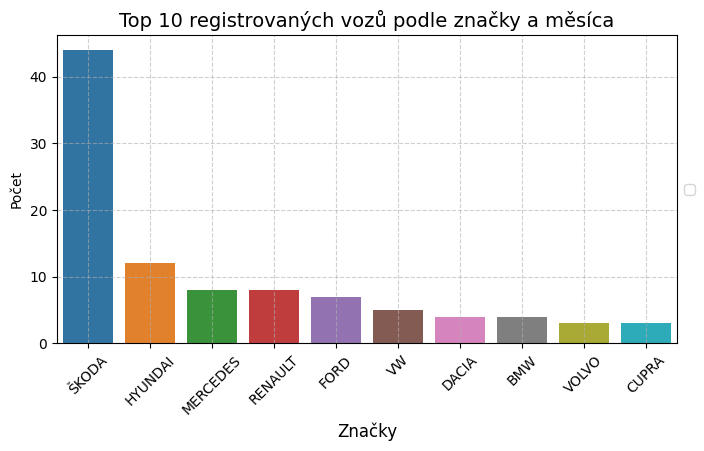

In [34]:
# Graf: Top_10_Registrace_podle_znacky_a_mesica
plt.figure(figsize=(8, 4))
sns.barplot(
    x='znacka',
    y='count',
    data=grouped_month_brand.head(10),
    palette='tab10',
    errorbar=None,
)

plt.title("Top 10 registrovaných vozů podle značky a měsíca", fontsize=14)
plt.xlabel("Značky", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_značky_a_měsíce.png', bbox_inches='tight', dpi=300)
plt.show()

In [35]:
grouped_month_motor = last_month_cars.groupby(['palivo']).size().reset_index(name='count')
grouped_month_motor = grouped_month_motor.sort_values(by='count', ascending=False)
print(grouped_month_motor)

                  palivo  count
0                 Benzin     79
5                  Nafta     42
3           Elektropohon     13
2           Benzín + LPG      3
1  Benzín + Elektropohon      2
4   Elektropohon + Nafta      1


<ipython-input-36-1995c3cdcd27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


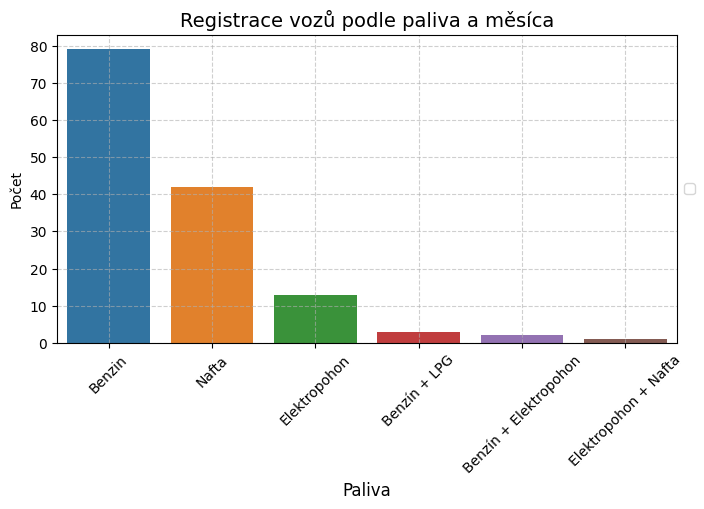

In [36]:
# Graf: Top_10_Registrace_podle_paliva_a_mesica
plt.figure(figsize=(8, 4))
sns.barplot(
    x='palivo',
    y='count',
    data=grouped_month_motor,
    palette='tab10',
    errorbar=None,
)

plt.title("Registrace vozů podle paliva a měsíca", fontsize=14)
plt.xlabel("Paliva", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_paliva_a_měsíce.png', bbox_inches='tight', dpi=300)
plt.show()

In [37]:
grouped_month_type = last_month_cars.groupby(['druh']).size().reset_index(name='count')
grouped_month_type = grouped_month_type.sort_values(by='count', ascending=False)
print(grouped_month_type)

                        druh  count
3           OSOBNÍ AUTOMOBIL     99
2         NÁKLADNÍ AUTOMOBIL     16
4           PŘÍPOJNÉ VOZIDLO     14
1                   MOTOCYKL      4
6             TRAKTOR KOLOVÝ      3
7  VOZIDLO ZVLÁŠTNÍHO URČENÍ      2
0                    AUTOBUS      1
5            PŘÍVĚS NÁKLADNÍ      1


<ipython-input-38-2ba13c484054>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


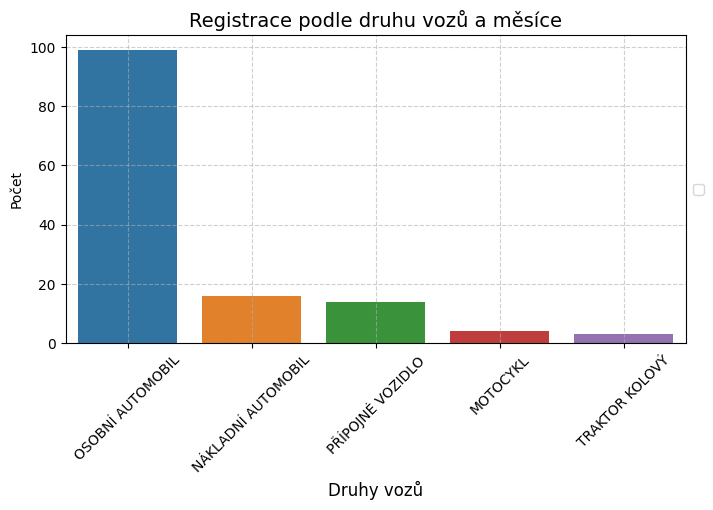

In [38]:
# Graf: Top_10_Registrace_podle_druhu_vozidla_a_mesica
plt.figure(figsize=(8, 4))
sns.barplot(
    x='druh',
    y='count',
    data=grouped_month_type.head(),
    palette='tab10',
    errorbar=None,
)

plt.title("Registrace podle druhu vozů a měsíce", fontsize=14)
plt.xlabel("Druhy vozů", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_druhu_vozidla_a_měsíce.png', bbox_inches='tight', dpi=300)
plt.show()

#Výpočet a výstup požadovaných výsledků za poslední roc

In [39]:
# Last year period
year_ago = last_registration_date - pd.DateOffset(years=1)

# Cars registered in the last year
last_year_cars = df[df['prvni_registrace'] >= year_ago]


In [40]:
last_year_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1704 entries, 4176 to 91822
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pcv                     1704 non-null   int64         
 1   vin                     1704 non-null   object        
 2   hluk_jizda              1704 non-null   float64       
 3   hmotnost_povolena       1704 non-null   float64       
 4   hmotnost_pripustna      1704 non-null   float64       
 5   hmotnost_provozni       1704 non-null   float64       
 6   stav                    1704 non-null   object        
 7   barva                   1704 non-null   object        
 8   kategorie               1704 non-null   object        
 9   model                   1704 non-null   object        
 10  druh                    1704 non-null   object        
 11  vyroba_rok              1704 non-null   int32         
 12  vyrobce                 1704 non-null   object   

In [41]:
last_year_cars.shape

(1704, 29)

In [42]:
last_year_cars.head()

,pcv,vin,hluk_jizda,hmotnost_povolena,hmotnost_pripustna,hmotnost_provozni,stav,barva,kategorie,model,...,delka,sirka,vyska,spotreba_mimo_mesto,spotreba_prumerna,prvni_registrace,prvni_registrace_cr,rok_registrace_cr,rok_registrace,místo_prvni_registrace
4176,18213800,1C6SRFHT2NN216837,74.8,3221.0,3221.0,2842.0,PROVOZOVANE,CERNA,N1,OCTAVIA,...,5916.0,2084.0,1971.0,5.629995,16.600000,2023-12-18,2023-12-18,2023,2023,Česká republika
5694,18652400,1C4PJXAN7RW181901,74.0,2450.0,2450.0,2133.0,PROVOZOVANE,ZELENA,M1,OCTAVIA,...,4237.0,1877.0,1869.0,5.629995,11.500000,2024-09-25,2024-10-16,2024,2024,Inne
6697,18512800,1LV4052MCNN201031,80.0,4000.0,4000.0,1980.0,PROVOZOVANE,ZELENA,T2,OCTAVIA,...,3652.0,2090.0,2628.0,5.629995,6.553595,2024-07-09,2024-07-09,2024,2024,Česká republika
6703,18196200,1RW8340DEPB228230,82.0,18000.0,18000.0,16900.0,PROVOZOVANE,ZELENA,T1,OCTAVIA,...,6546.0,2955.0,3607.0,5.629995,6.553595,2023-12-04,2023-12-04,2023,2023,Česká republika
9602,18352000,1PY5058ETPE001671,76.0,5100.0,5100.0,3300.0,PROVOZOVANE,ZELENA,T2,OCTAVIA,...,3980.0,2250.0,2650.0,5.629995,6.553595,2024-03-27,2024-03-27,2024,2024,Česká republika


In [43]:
grouped_year_brand = last_year_cars.groupby(['znacka']).size().reset_index(name='count')
grouped_year_brand = grouped_year_brand.sort_values(by='count', ascending=False)
print(grouped_year_brand.head(10))

       znacka  count
121     ŠKODA    454
34    HYUNDAI    123
105    TOYOTA    107
114        VW     91
47        KIA     59
26       FORD     57
66   MERCEDES     54
16      DACIA     42
85    RENAULT     42
6         BMW     37


<ipython-input-44-7176ebd59ed0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


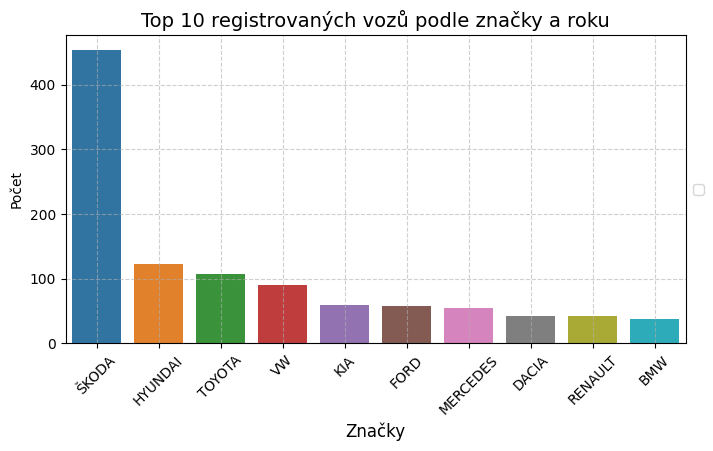

In [44]:
# Graf: Top_10_Registrace_podle_znacky_a_roku
plt.figure(figsize=(8, 4))
sns.barplot(
    x='znacka',
    y='count',
    data=grouped_year_brand.head(10),
    palette='tab10',
    errorbar=None,
)

plt.title("Top 10 registrovaných vozů podle značky a roku", fontsize=14)
plt.xlabel("Značky", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_značky_a_roku.png', bbox_inches='tight', dpi=300)
plt.show()

In [45]:
grouped_year_motor = last_year_cars.groupby(['palivo']).size().reset_index(name='count')
grouped_year_motor = grouped_year_motor.sort_values(by='count', ascending=False)
print(grouped_year_motor)

                  palivo  count
0                 Benzin   1062
6                  Nafta    499
4           Elektropohon     78
1  Benzín + Elektropohon     34
2           Benzín + LPG     26
5   Elektropohon + Nafta      3
3                    CNG      2


<ipython-input-46-fbae6865b725>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


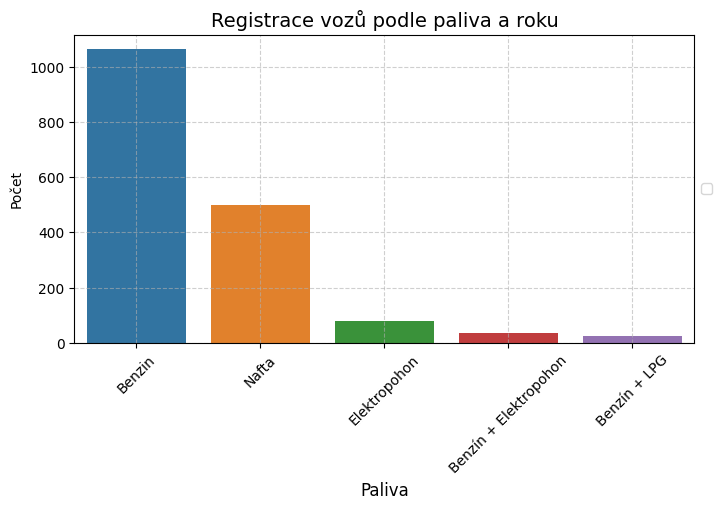

In [46]:
# Graf: Top_5_Registrace_podle_paliva_a_roku
plt.figure(figsize=(8, 4))
sns.barplot(
    x='palivo',
    y='count',
    data=grouped_year_motor.head(),
    palette='tab10',
    errorbar=None,
)

plt.title("Registrace vozů podle paliva a roku", fontsize=14)
plt.xlabel("Paliva", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_paliva_a_roku.png', bbox_inches='tight', dpi=300)
plt.show()

In [47]:
grouped_year_type = last_year_cars.groupby(['druh']).size().reset_index(name='count')
grouped_year_type = grouped_year_type.sort_values(by='count', ascending=False)
print(grouped_year_type)

                         druh  count
5            OSOBNÍ AUTOMOBIL   1178
7            PŘÍPOJNÉ VOZIDLO    175
3          NÁKLADNÍ AUTOMOBIL    148
2                    MOTOCYKL    127
10  VOZIDLO ZVLÁŠTNÍHO URČENÍ     30
9              TRAKTOR KOLOVÝ     28
0                     AUTOBUS      8
6   PRACOVNÍ STROJ SAMOJÍZDNÝ      7
1                       MOPED      1
4             NÁVĚS SPECIÁLNÍ      1
8             PŘÍVĚS NÁKLADNÍ      1


<ipython-input-48-d7d2dd21a420>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


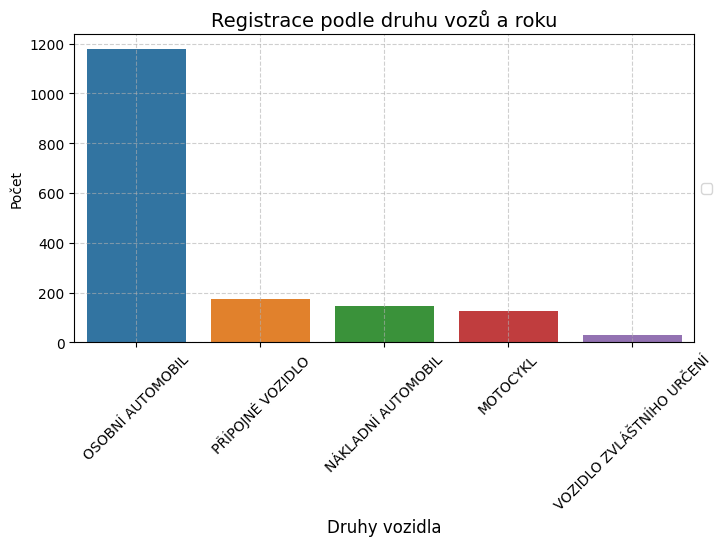

In [48]:
# Graf: Top_10_Registrace_podle_druhu_vozidla_a_roku
plt.figure(figsize=(8, 4))
sns.barplot(
    x='druh',
    y='count',
    data=grouped_year_type.head(),
    palette='tab10',
    errorbar=None,
)

plt.title("Registrace podle druhu vozů a roku", fontsize=14)
plt.xlabel("Druhy vozidla", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_druhu_vozidla_a_roku.png', bbox_inches='tight', dpi=300)
plt.show()

In [49]:
grouped_year_state = last_year_cars.groupby(['stav']).size().reset_index(name='count')
grouped_year_state = grouped_year_state.sort_values(by='count', ascending=False)
print(grouped_year_state)

                 stav  count
1         PROVOZOVANE   1645
0    ODHLASENO_CIZINA     54
2  VYRAZENO_Z_PROVOZU      5


<ipython-input-50-ca5b4a136029>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


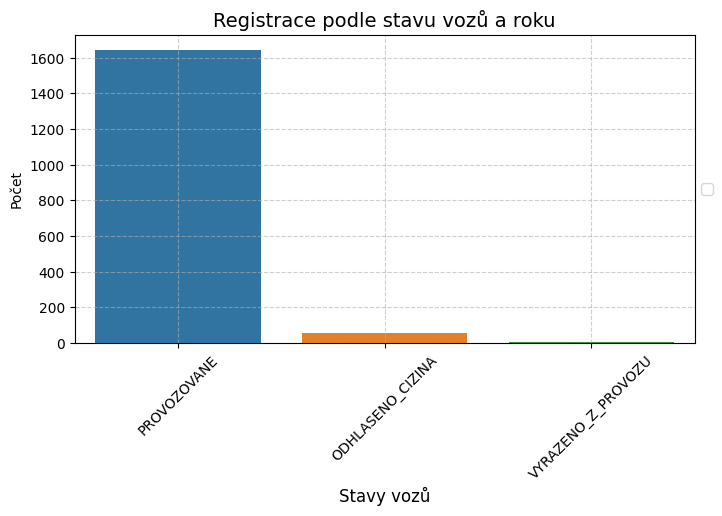

In [50]:
# Graf: Top_10_Registrace_podle_stavu_vozidla_a_roku
plt.figure(figsize=(8, 4))
sns.barplot(
    x='stav',
    y='count',
    data=grouped_year_state,
    palette='tab10',
    errorbar=None,
)

plt.title("Registrace podle stavu vozů a roku", fontsize=14)
plt.xlabel("Stavy vozů", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_stavu_vozidla_a_roku.png', bbox_inches='tight', dpi=300)
plt.show()

#Výpočet a výstup požadovaných výsledků za poslední 15 let

**Separate the last 15 years from the dataset**

In [51]:
start_date = pd.Timestamp('2010-01-01')
end_date = pd.Timestamp('2024-11-19')

# Filtration by the period
cars_15_years = df[(df['prvni_registrace_cr'] >= start_date) & (df['prvni_registrace_cr'] <= end_date)]

cars_15_years.head()

,pcv,vin,hluk_jizda,hmotnost_povolena,hmotnost_pripustna,hmotnost_provozni,stav,barva,kategorie,model,...,delka,sirka,vyska,spotreba_mimo_mesto,spotreba_prumerna,prvni_registrace,prvni_registrace_cr,rok_registrace_cr,rok_registrace,místo_prvni_registrace
28,17425800,00052074,78.5,390.0,390.0,186.0,PROVOZOVANE,CERVENA,L3,OCTAVIA,...,2100.0,780.0,1100.0,5.629995,6.553595,2011-09-06,2022-06-13,2022,2011,Inne
39,6835800,000F4G4L41NN03862,81.5,8000.0,8000.0,4309.0,PROVOZOVANE,CERVENA,T1,125,...,5047.0,2430.0,2772.0,5.629995,6.553595,2011-10-10,2011-10-10,2011,2011,Česká republika
40,13423800,000F5G5M41ST03012,83.5,8000.0,8000.0,4300.0,PROVOZOVANE,CERVENA,T1,OCTAVIA,...,5603.0,2430.0,2783.0,5.629995,6.553595,2015-03-25,2015-03-25,2015,2015,Česká republika
41,14214600,000F5L5M42TC02268,85.0,8000.0,8000.0,4400.0,PROVOZOVANE,CERVENA,T1,OCTAVIA,...,5703.0,2430.0,2783.0,5.629995,6.553595,2016-09-09,2016-09-09,2016,2016,Česká republika
42,13348600,000P2B4J47ST01951,79.5,5500.0,5500.0,3750.0,PROVOZOVANE,CERVENA,T1,OCTAVIA,...,4710.0,2319.0,2725.0,5.629995,6.553595,2015-01-21,2015-01-21,2015,2015,Česká republika


In [52]:
cars_15_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36402 entries, 28 to 92029
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   pcv                     36402 non-null  int64         
 1   vin                     36402 non-null  object        
 2   hluk_jizda              36402 non-null  float64       
 3   hmotnost_povolena       36402 non-null  float64       
 4   hmotnost_pripustna      36402 non-null  float64       
 5   hmotnost_provozni       36402 non-null  float64       
 6   stav                    36402 non-null  object        
 7   barva                   36402 non-null  object        
 8   kategorie               36402 non-null  object        
 9   model                   36402 non-null  object        
 10  druh                    36402 non-null  object        
 11  vyroba_rok              36402 non-null  int32         
 12  vyrobce                 36402 non-null  object    

**Přidávám kolonku pro periodizaci let výroby auta a let první registrace v Česku**

In [53]:
def year_group(year):
    if pd.isna(year):
        return np.nan
    current_year = 2024
    age = current_year - year

    if age <= 3:
        return '2022-2024'
    elif 3 < age <= 6:
        return '2019-2021'
    elif 6 < age <= 9:
        return '2016-2018'
    elif 9 < age <= 12:
        return '2013-2015'
    else:
        return '2010-2012'

cars_15_years['period_registrace'] = cars_15_years['rok_registrace'].apply(year_group)
cars_15_years['period_registrace_cr'] = cars_15_years['rok_registrace_cr'].apply(year_group)


print(cars_15_years['period_registrace'].unique())
print(cars_15_years['period_registrace_cr'].unique())

['2010-2012' '2016-2018' '2013-2015' '2022-2024' '2019-2021']
['2022-2024' '2010-2012' '2016-2018' '2013-2015' '2019-2021']


<ipython-input-53-6e369107c3c3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_15_years['period_registrace'] = cars_15_years['rok_registrace'].apply(year_group)
<ipython-input-53-6e369107c3c3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_15_years['period_registrace_cr'] = cars_15_years['rok_registrace_cr'].apply(year_group)


In [54]:
grouped_brand_model=cars_15_years.groupby(['znacka']).size().reset_index(name='count')
grouped_brand_model = grouped_brand_model.sort_values(by='count', ascending=False)
top_20_max_brand_model= grouped_brand_model.head(20).round()

print(f'20 nejprodávanějších značek vozů: \n{top_20_max_brand_model}')

20 nejprodávanějších značek vozů: 
       znacka  count
310     ŠKODA   8335
285        VW   3618
81       FORD   2275
105   HYUNDAI   1499
177  MERCEDES   1308
199   PEUGEOT   1308
210   RENAULT   1287
24        BMW   1116
52    CITROËN    938
3      AGADOS    930
196      OPEL    871
267    TOYOTA    870
58      DACIA    769
128       KIA    766
14       AUDI    718
79       FIAT    655
95      HONDA    635
230      SEAT    588
249    SUZUKI    509
284     VOLVO    496


In [55]:
top_20_max_brand_model ['znacka'].values.tolist()

['ŠKODA',
 'VW',
 'FORD',
 'HYUNDAI',
 'MERCEDES',
 'PEUGEOT',
 'RENAULT',
 'BMW',
 'CITROËN',
 'AGADOS',
 'OPEL',
 'TOYOTA',
 'DACIA',
 'KIA',
 'AUDI',
 'FIAT',
 'HONDA',
 'SEAT',
 'SUZUKI',
 'VOLVO']

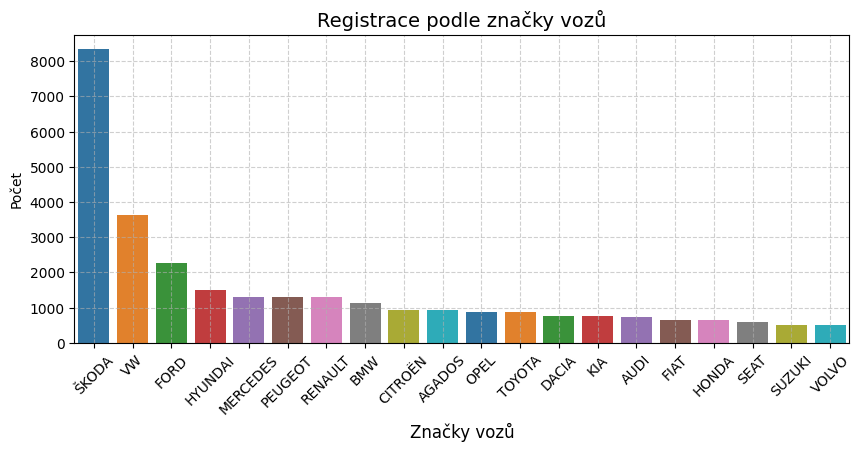

In [56]:
# Graf: Registrace podle značky vozů
plt.figure(figsize=(10, 4))
sns.barplot(
    x='znacka',
    y='count',
    data=top_20_max_brand_model,
    hue='znacka',
    dodge=False,
    errorbar=None,
    palette='tab10',
    legend=False
)
plt.title("Registrace podle značky vozů", fontsize=14)
plt.xlabel("Značky vozů", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_značky_vozidel.png', bbox_inches='tight', dpi=300)
plt.show()

In [57]:
grouped_fuel_motor = cars_15_years.groupby(['palivo']).size().reset_index(name='count')
grouped_fuel_motor = grouped_fuel_motor.sort_values(by='count', ascending=False)
print(grouped_fuel_motor)

                   palivo  count
2                  Benzin  19899
12                  Nafta  15117
7            Benzín + LPG    492
9            Elektropohon    287
1               BIO Nafta    175
4   Benzín + Elektropohon    160
8                     CNG     95
3            Benzín + CNG     80
10   Elektropohon + Nafta     38
0                 BA SMĚS     37
5     Benzín + Etanol 85%     13
6            Benzín + LNG      6
11                    LNG      3


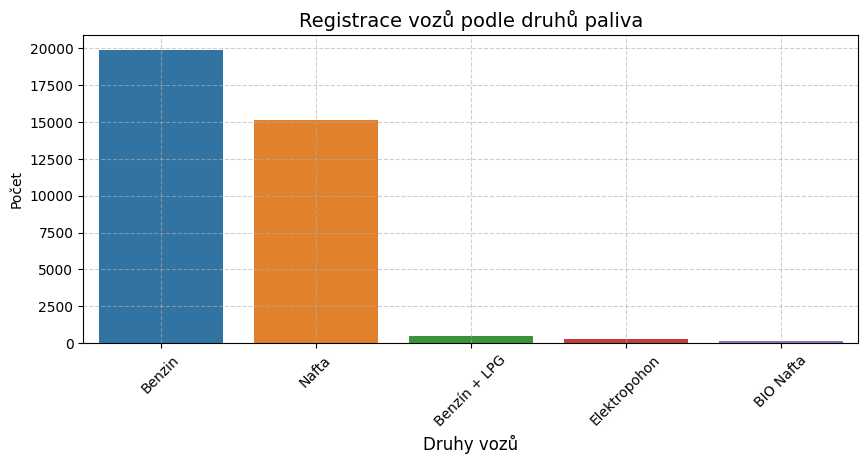

In [58]:
# Graf: Registrace podle značky vozů
plt.figure(figsize=(10, 4))
sns.barplot(
    x='palivo',
    y='count',
    data=grouped_fuel_motor.head(),
    hue='palivo',
    dodge=False,
    errorbar=None,
    palette='tab10',
    legend=False
)
plt.title("Registrace vozů podle druhů paliva", fontsize=14)
plt.xlabel("Druhy vozů", fontsize=12)
plt.ylabel("Počet", fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Registrace_podle_paliva.png', bbox_inches='tight', dpi=300)
plt.show()

In [59]:
# Seskupení podle spotřeby benzinu a značky, protože auta na benzinu se liší maximální spotřebou paliva
benz_data = cars_15_years[cars_15_years['palivo'] == 'Benzin']
grouped_benz_data = benz_data.groupby(['znacka']).agg(avg_spotreba=('spotreba_prumerna', 'mean')).reset_index()
grouped_benz_data = grouped_benz_data.sort_values(by='avg_spotreba', ascending=False)

top_10_max_consump_benz= grouped_benz_data.head(10)
top_10_min_consump_benz= grouped_benz_data.tail(10)
print (f'Top 10 znacek s maximalnou spotrebou benzinu: \n{top_10_max_consump_benz}','\n')
print (f'Top 10 druhu znacek s minimalnou spotrebou benzinu: \n{top_10_min_consump_benz}')

Top 10 znacek s maximalnou spotrebou benzinu: 
           znacka  avg_spotreba
163       POLARIS    116.825418
137      MASERATI    101.800000
71            GAZ     18.600000
66        FERRARI     15.133333
177   ROLLS-ROYCE     15.100000
85         HUMMER     14.500000
9    ASTON MARTIN     13.900000
118   LAMBORGHINI     13.770719
17        BENTLEY     13.550000
169           RAM     13.251198 

Top 10 druhu znacek s minimalnou spotrebou benzinu: 
            znacka  avg_spotreba
88       HUSQVARNA      4.745098
105        KENTOYA      4.476654
181            RVM      4.300000
180  ROYAL ENFIELD      3.975599
45             CLS      3.938399
19            BETA      3.772456
234           VOGE      3.725000
16         BENELLI      3.623708
104         KEEWAY      3.427926
256       ZONGSHEN      2.800000


In [60]:
# Seskupení podle spotřeby nafty a značky, protože auta na nafte se vyznačují vysokou spotřebou paliva
nafta_data = cars_15_years[cars_15_years['palivo'] == 'Nafta']
grouped_nafta_data = nafta_data.groupby(['znacka']).agg(avg_spotreba=('spotreba_prumerna', 'mean')).reset_index()
grouped_nafta_data = grouped_nafta_data.sort_values(by='avg_spotreba', ascending=False)

top_10_max_consump_nafta= grouped_nafta_data.head(10)
top_10_min_consump_nafta= grouped_nafta_data.tail(10)
print (f'Top 10 znacek s maximalnou spotrebou nafty: \n{top_10_max_consump_nafta}','\n')
print (f'Top 10 druhu znacek s minimalnou spotrebou nafty: \n{top_10_min_consump_nafta}')

Top 10 znacek s maximalnou spotrebou nafty: 
             znacka  avg_spotreba
33            HOBBY     12.500000
61              LMC     11.500000
112       WEINSBERG     11.150000
83          PARAGAN      9.951198
72    MERCEDES-BENZ      9.680665
27             EURA      9.300000
35            HYMER      8.969063
71         MERCEDES      8.929006
54   LAIKA CARAVANS      8.650000
87            RIMOR      8.513399 

Top 10 druhu znacek s minimalnou spotrebou nafty: 
            znacka  avg_spotreba
59          LIGIER      5.765196
48             KIA      5.662138
34           HONDA      5.637500
91            SEAT      5.605932
36         HYUNDAI      5.591462
116          ŠKODA      5.464891
21           DACIA      4.832376
76            MINI      4.462500
93           SMART      3.400000
74   MICRO COMPACT      3.400000


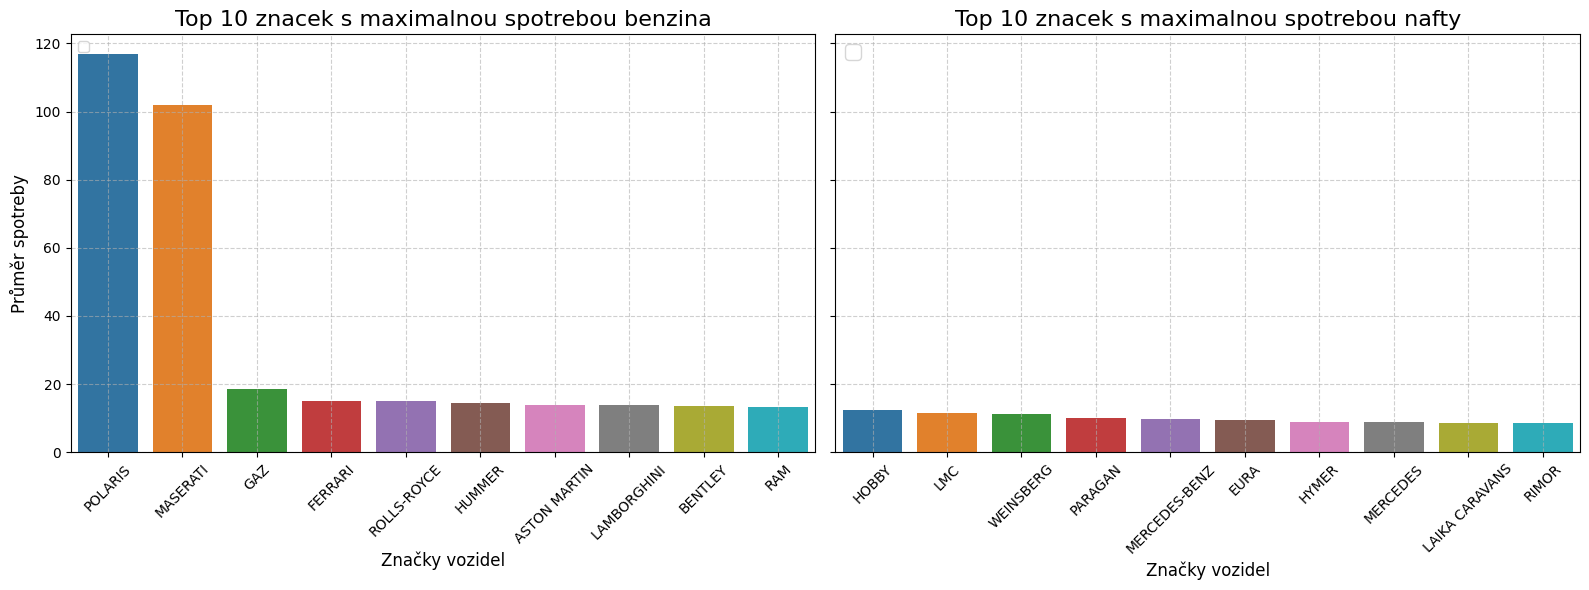

In [61]:
#Graf: Top 10 znacek s maximalnou spotrebou benzina a nafty

# Plotting two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Subplot 1: Data for Cesko
sns.barplot(
    ax=axes[0],
    x='znacka',
    y='avg_spotreba',
    hue='znacka',
    data=top_10_max_consump_benz,
    palette='tab10',
    errorbar=None

)
axes[0].set_title("Top 10 znacek s maximalnou spotrebou benzina", fontsize=16)
axes[0].set_xlabel("Značky vozidel", fontsize=12)
axes[0].set_ylabel("Průměr spotreby", fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend(loc='upper left')

# Subplot 2: Data for other country
sns.barplot(
    ax=axes[1],
    x='znacka',
    y='avg_spotreba',
    hue='znacka',
    data=top_10_max_consump_nafta,
    palette='tab10',
    errorbar=None

)
axes[1].set_title("Top 10 znacek s maximalnou spotrebou nafty", fontsize=16)
axes[1].set_xlabel("Značky vozidel", fontsize=12)
axes[1].set_ylabel("Průměr spotreby", fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend(loc='upper left',fontsize=14)

plt.tight_layout()
plt.savefig('Top 10 znacek s maximalnou spotrebou benzina a nafty.png', bbox_inches='tight', dpi=300)
plt.show()

In [62]:
# Seskupení podle skupiny roku vyroby
grouped_years_production = cars_15_years.groupby(['period_registrace']).size().reset_index(name='count')

grouped_years_production = grouped_years_production.sort_values(by='count', ascending=False)
print(grouped_years_production)

  period_registrace  count
0         2010-2012  12686
4         2022-2024   6462
2         2016-2018   6289
3         2019-2021   5703
1         2013-2015   5262


<ipython-input-63-3df7e7e560f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


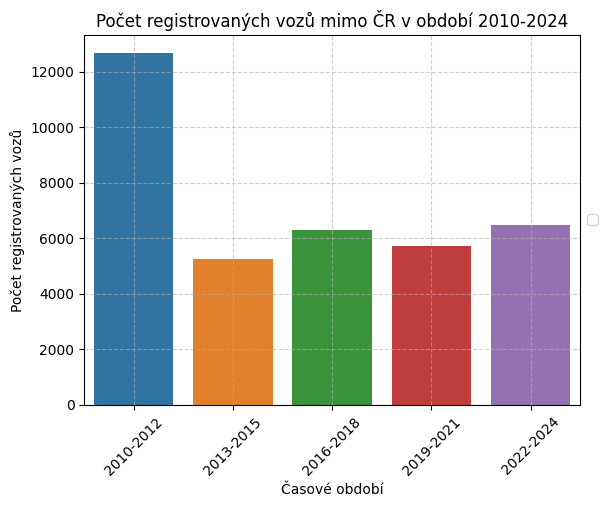

In [63]:
# Graf: Počet registrovaných vozů mimo ČR v období 2010-2024
count_data_foreign = cars_15_years.groupby(['period_registrace']).size().reset_index(name='count')
period_order = ['2010-2012','2013-2015', '2016-2018','2019-2021','2022-2024']
sns.barplot(
    x='period_registrace',
    y='count',
    data=count_data_foreign,
    palette='tab10',
    errorbar=None,
    order=period_order

)

plt.title("Počet registrovaných vozů mimo ČR v období 2010-2024")
plt.xlabel("Časové období")
plt.ylabel("Počet registrovaných vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Počet registrovaných vozů mimo ČR v období 2010-2024.png', bbox_inches='tight', dpi=300)
plt.show()

<ipython-input-64-64fcb983cab7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


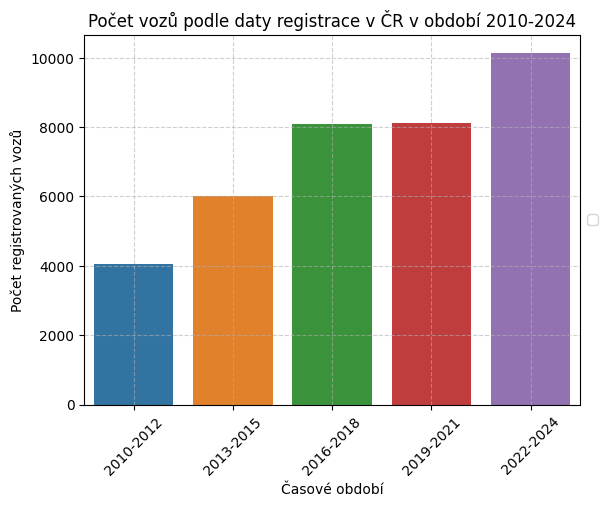

In [64]:
# Graf: Počet vozů podle první daty registrace v ČR v období 2010-2024
count_data_cr = cars_15_years.groupby(['period_registrace_cr']).size().reset_index(name='count')
period_order = ['2010-2012','2013-2015', '2016-2018','2019-2021','2022-2024']
sns.barplot(
    x='period_registrace_cr',
    y='count',
    data=count_data_cr,
    palette='tab10',
    errorbar=None,
    order=period_order
)

plt.title("Počet vozů podle daty registrace v ČR v období 2010-2024")
plt.xlabel("Časové období")
plt.ylabel("Počet registrovaných vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Počet vozů podle daty registrace v ČR  v období 2010-2024.png', bbox_inches='tight', dpi=300)
plt.show()

In [65]:
# Vytvoření seskupené tabulky s údaji o automobilech registrovaných v České republice a v zahraničí za období 2010 až 2024.
count_data_foreign.columns = ['period_registrace', 'mimo_cr']
count_data_cr.columns = ['period_registrace', 'cr']
count_data = pd.merge(count_data_foreign, count_data_cr, on='period_registrace')
count_data

,period_registrace,mimo_cr,cr
0,2010-2012,12686,4043
1,2013-2015,5262,6000
2,2016-2018,6289,8101
3,2019-2021,5703,8111
4,2022-2024,6462,10147


In [66]:
grouped_type = cars_15_years.groupby(['druh']).size().reset_index(name='count')
grouped_type = grouped_type.sort_values(by='count', ascending=False)
top_10_type= grouped_type.head(10)
print(top_10_type)

                         druh  count
23           OSOBNÍ AUTOMOBIL  26936
7          NÁKLADNÍ AUTOMOBIL   2776
4                    MOTOCYKL   2565
33           PŘÍPOJNÉ VOZIDLO   1658
34            PŘÍVĚS NÁKLADNÍ    887
52  VOZIDLO ZVLÁŠTNÍHO URČENÍ    360
49             TRAKTOR KOLOVÝ    220
32  PRACOVNÍ STROJ SAMOJÍZDNÝ    194
48                    TRAKTOR    164
15             NÁVĚS NÁKLADNÍ    149


<ipython-input-67-01c221eecb7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


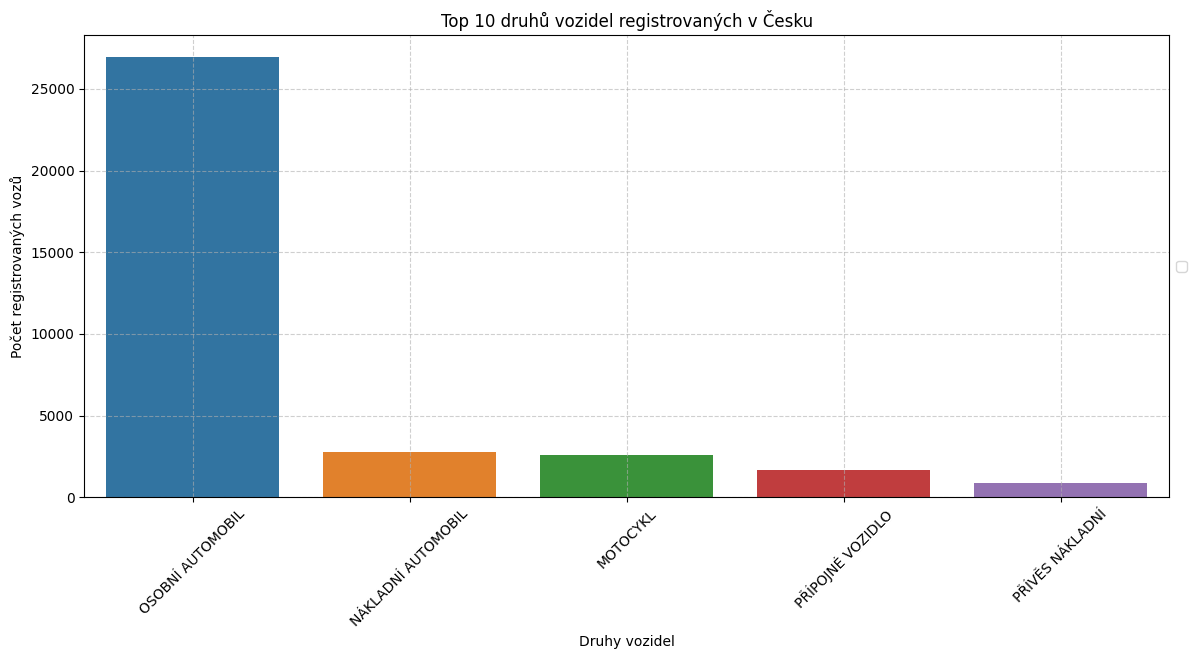

In [67]:
# Graf: Top 10 druhů vozidel registrovaných v Česku
plt.figure(figsize=(14, 6))
sns.barplot(
    x='druh',
    y='count',
    data=top_10_type.head(),
    palette='tab10',
    errorbar=None

)

plt.title("Top 10 druhů vozidel registrovaných v Česku")
plt.xlabel("Druhy vozidel")
plt.ylabel("Počet registrovaných vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Top 10 druhů vozidel registrovaných v Česku.png', bbox_inches='tight', dpi=300)
plt.show()

In [68]:
grouped_color = cars_15_years.groupby(['barva']).size().reset_index(name='count')
grouped_color = grouped_color.sort_values(by='count', ascending=False)
print(grouped_color.head(10))

      barva  count
7      SEDA  10915
0      BILA   7664
1     CERNA   5148
5     MODRA   4765
2   CERVENA   3635
4     HNEDA   1546
8    ZELENA   1296
9     ZLUTA    768
6  ORANZOVA    579
3   FIALOVA     86


<ipython-input-69-bc4b76082d69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


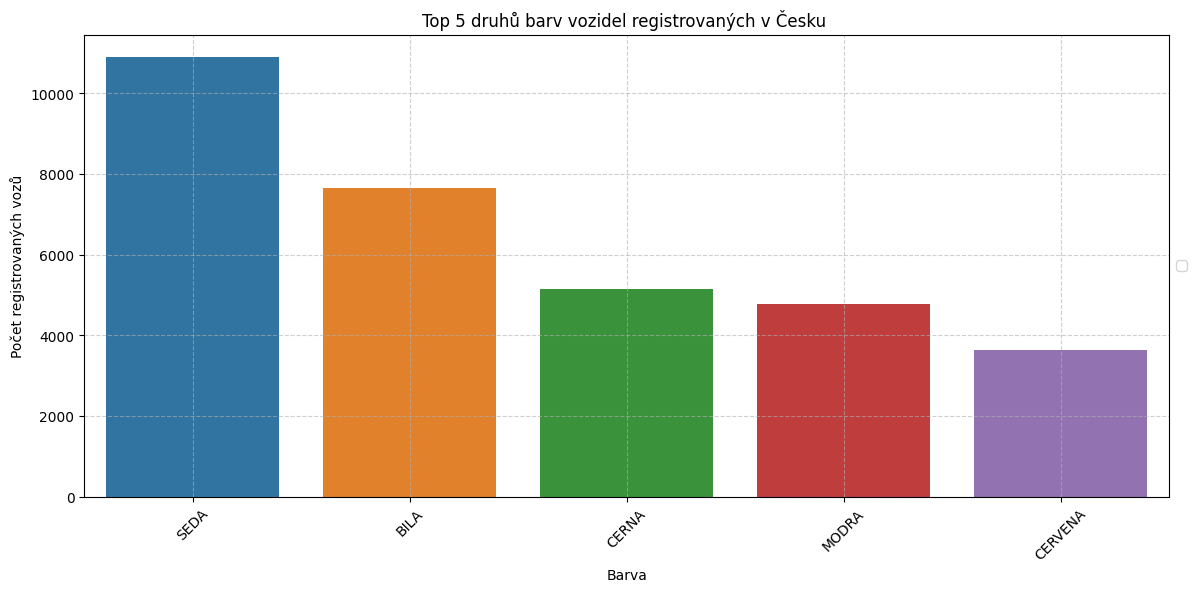

In [69]:
# Graf: Top 5 druhů barv vozidel registrovaných v Česku
plt.figure(figsize=(14, 6))
sns.barplot(
    x='barva',
    y='count',
    data=grouped_color.head(5),
    palette='tab10',
    errorbar=None

)

plt.title("Top 5 druhů barv vozidel registrovaných v Česku ")
plt.xlabel('Barva')
plt.ylabel("Počet registrovaných vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Top 5 druhů barv vozidel registrovaných v Česku.png', bbox_inches='tight', dpi=300)
plt.show()

In [70]:
grouped_state = cars_15_years.groupby(['stav']).size().reset_index(name='count')
grouped_state = grouped_state.sort_values(by='count', ascending=False)
print(grouped_state)

                 stav  count
1         PROVOZOVANE  32852
0    ODHLASENO_CIZINA   1677
3               ZANIK   1459
2  VYRAZENO_Z_PROVOZU    414


<ipython-input-71-d013d5eda75d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


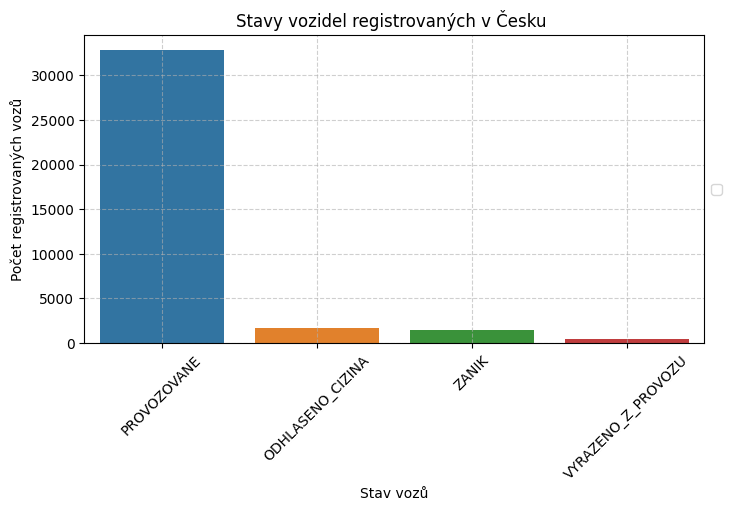

In [71]:
# Graf: Stavy vozidel registrovaných v Česku
plt.figure(figsize=(8, 4))
sns.barplot(
    x='stav',
    y='count',
    data=grouped_state,
    palette='tab10',
    errorbar=None

)

plt.title("Stavy vozidel registrovaných v Česku ")
plt.xlabel('Stav vozů')
plt.ylabel("Počet registrovaných vozů")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig('Stavy vozidel registrovaných v Česku.png', bbox_inches='tight', dpi=300)
plt.show()

#Ukládání výsledků do souborů ve formátu Excel

In [72]:
!pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.0 MB/s eta 0:00:00


grouped_benz_data
grouped_nafta_data
grouped_years_production
count_data_foreign
count_data_cr



In [73]:
all_15_dfs = {
    'all_col': cars_15_years,
    'per_color': grouped_color,
    'per_state': grouped_state,
    'per_type': grouped_type,
    'per_brand': grouped_brand_model,
    'per_benzin_consumption': grouped_benz_data,
    'per_nafta_consumption':grouped_nafta_data,
    'per_year_production':grouped_years_production,
    'per_place_production': count_data,
    'per_fuel_motor': grouped_fuel_motor
}

with pd.ExcelWriter('auto_15_data.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, df in all_15_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)


In [74]:
with pd.ExcelWriter('day_auto_data.xlsx', engine='xlsxwriter') as writer:
    last_day_cars.to_excel(writer, sheet_name='auto_all_col', index=True)
    last_day_cars.to_excel(writer, sheet_name='chosen_col', index=True)

In [75]:
week_dfs = {
    'all_col': last_week_cars,
    'per_type': grouped_week_type,
    'per_brand': grouped_week_brand,
    'per_motor': grouped_week_motor
    }

with pd.ExcelWriter('week_auto_data.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, df in week_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=True)


In [76]:
month_dfs = {
    'all_col': last_month_cars,
    'per_typer': grouped_month_type,
    'per_brand': grouped_month_brand,
    'per_motor': grouped_month_motor,
}

with pd.ExcelWriter('month_auto_data.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, df in month_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=True)

In [77]:
year_dfs = {
    'all_col': last_year_cars,
    'per_type': grouped_year_type,
    'per_brand': grouped_year_brand,
    'per_motor': grouped_year_motor,
    'per_state': grouped_year_state
}

with pd.ExcelWriter('year_auto_data.xlsx', engine='xlsxwriter') as writer:
    for sheet_name, df in year_dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=True)